# 1) Understand the Dataset.

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory = False)

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,85 STREET,NaN,NaN,ADDRESS,WOODHAVEN,NaN,Precinct,Closed,01/01/2015 08:04:44 AM,The Police Department responded to the complai...,01/01/2015 10:22:31 AM,09 QUEENS,QUEENS,1022809.0,192567.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,BEND,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2015 08:04:28 AM,The Police Department responded to the complai...,01/01/2015 02:25:02 AM,07 BRONX,BRONX,1009923.0,255465.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2015 08:01:30 AM,The Police Department responded to the complai...,01/01/2015 12:20:33 AM,09 MANHATTAN,MANHATTAN,997847.0,238629.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AVENUE,PAULDING AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2015 08:01:29 AM,The Police Department responded and upon arriv...,01/01/2015 02:42:22 AM,12 BRONX,BRONX,1024816.0,262237.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,135 STREET,ROCKAWAY BOULEVARD,SUTTER AVENUE,NaN,NaN,ADDRESS,SOUTH OZONE PARK,NaN,Precinct,Closed,01/01/2015 08:00:50 AM,The Police Department responded to the complai...,01/01/2015 02:47:50 AM,10 QUEENS,QUEENS,1038733.0,184971.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


### 1.1) Identifying the shape of dataset.

In [6]:
df.shape

(364558, 53)

### 1.2) Identifying variables with null values

In [7]:
df.isna()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False
364554,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False
364555,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False
364556,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

# 2) Basic data exploratory analysis.

### 2.1) Missing Value Trearment

In [9]:
# only selecting columns that are usefull for further analysis. Excluding columns which have lot of missing values 
# and columns which are not important for required analysis.

req_data_df= df[['Created Date','Closed Date','Complaint Type','City','Longitude','Latitude']]

In [10]:
# Changing city names to uppercase because few city names are present in both upper and lower case. This will prevent from
# ploting them seperately, and it will combine the data for better analysis.

req_data_df['City']=req_data_df['City'].str.upper()

C:\Users\ankit\AppData\Local\Temp\ipykernel_15964\2741692139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data_df['City']=req_data_df['City'].str.upper()


In [11]:
req_data_df.head()

,Created Date,Closed Date,Complaint Type,City,Longitude,Latitude
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,Noise - Street/Sidewalk,NEW YORK,-73.923501,40.865682
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,Blocked Driveway,ASTORIA,-73.915094,40.775945
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,Blocked Driveway,BRONX,-73.888525,40.870325
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,Illegal Parking,BRONX,-73.828379,40.835994
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,Illegal Parking,ELMHURST,-73.874170,40.733060


### 2.2) Analyzing the date column and removing the entries if it has an incorrect timeline

#### Removing rows which have empty cells in 'City' and 'Closed Date' features. Rows in 'Closed Date' have open complaints which are not responded/confirmed, and does not provide data required for further analysis.

In [12]:
req_data_df['Closed Date'].replace('',np.nan,inplace=True)
req_data_df.dropna(subset= 'Closed Date', inplace=True)

req_data_df['City'].replace('', np.nan, inplace=True)
req_data_df.dropna(subset='City', inplace=True)

req_data_df[req_data_df['Complaint Type'] != 'Agency Issues'] # Removing rows which have complaints from within the department.

C:\Users\ankit\AppData\Local\Temp\ipykernel_15964\2547185138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data_df['Closed Date'].replace('',np.nan,inplace=True)
C:\Users\ankit\AppData\Local\Temp\ipykernel_15964\2547185138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data_df.dropna(subset= 'Closed Date', inplace=True)
C:\Users\ankit\AppData\Local\Temp\ipykernel_15964\2547185138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,Created Date,Closed Date,Complaint Type,City,Longitude,Latitude
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,Noise - Street/Sidewalk,NEW YORK,-73.923501,40.865682
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,Blocked Driveway,ASTORIA,-73.915094,40.775945
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,Blocked Driveway,BRONX,-73.888525,40.870325
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,Illegal Parking,BRONX,-73.828379,40.835994
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,Illegal Parking,ELMHURST,-73.874170,40.733060
...,...,...,...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,Illegal Parking,WOODHAVEN,-73.860949,40.695145
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,Noise - Vehicle,BRONX,-73.907178,40.867830
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,Noise - Street/Sidewalk,NEW YORK,-73.950873,40.821647
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,Blocked Driveway,BRONX,-73.853290,40.886361


In [13]:
# Changing datatype of 'Created Date' from 'object' to 'datetime64'.

req_data_df['Created Date'] = pd.to_datetime(req_data_df['Created Date'])
req_data_df['Closed Date'] = pd.to_datetime(req_data_df['Closed Date'])

C:\Users\ankit\AppData\Local\Temp\ipykernel_15964\2796731311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data_df['Created Date'] = pd.to_datetime(req_data_df['Created Date'])
C:\Users\ankit\AppData\Local\Temp\ipykernel_15964\2796731311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data_df['Closed Date'] = pd.to_datetime(req_data_df['Closed Date'])


In [14]:
req_data_df['Created Date'].dt.year

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
364553    2015
364554    2015
364555    2015
364556    2015
364557    2015
Name: Created Date, Length: 361503, dtype: int64

In [15]:
req_data_df['Created Date'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
364553     1
364554     1
364555     1
364556     1
364557     1
Name: Created Date, Length: 361503, dtype: int64

In [16]:
req_data_df.shape

(361503, 6)

### 2.3) Frequency plot for city-wise complaints

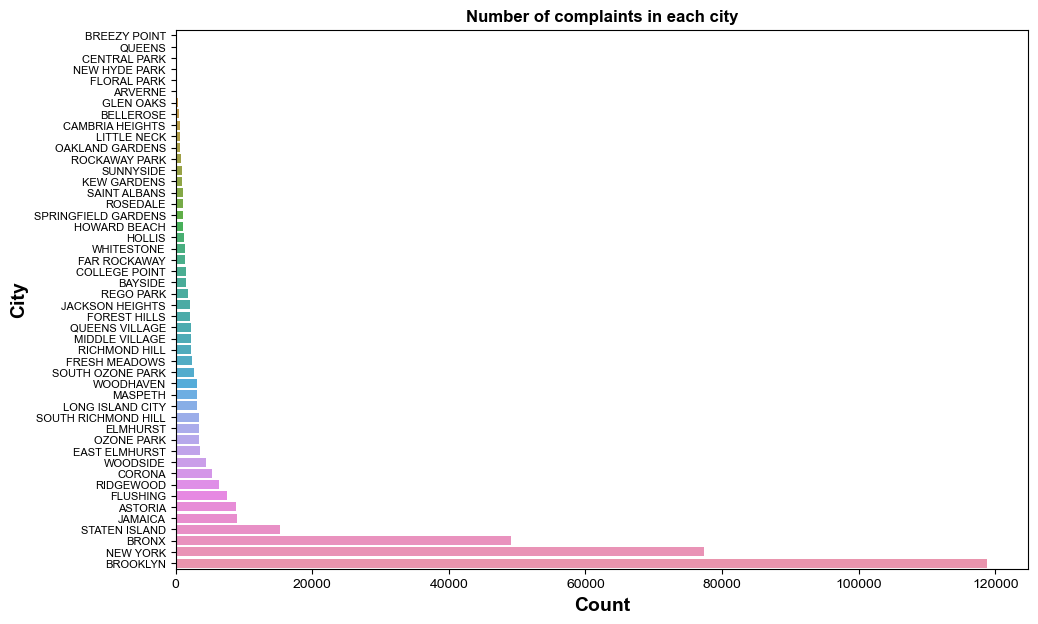

In [17]:
plt.figure(figsize=(11,7))
plt.title('Number of complaints in each city',weight='bold')
set_order = req_data_df["City"].value_counts(ascending=True).index      # setting it in ascending order for better visualization.
sn.countplot(y=req_data_df["City"],data=req_data_df, order=set_order)
sn.set_style("darkgrid")
plt.ylabel('City',size=14,weight='bold')
plt.xlabel('Count',size=14,weight='bold')
plt.yticks(fontsize=8)
plt.show()

***Brooklyn has the highest number of complaints, close to 120000. New York and Bronx is following at approximately 78000 and 50000 respectively.***

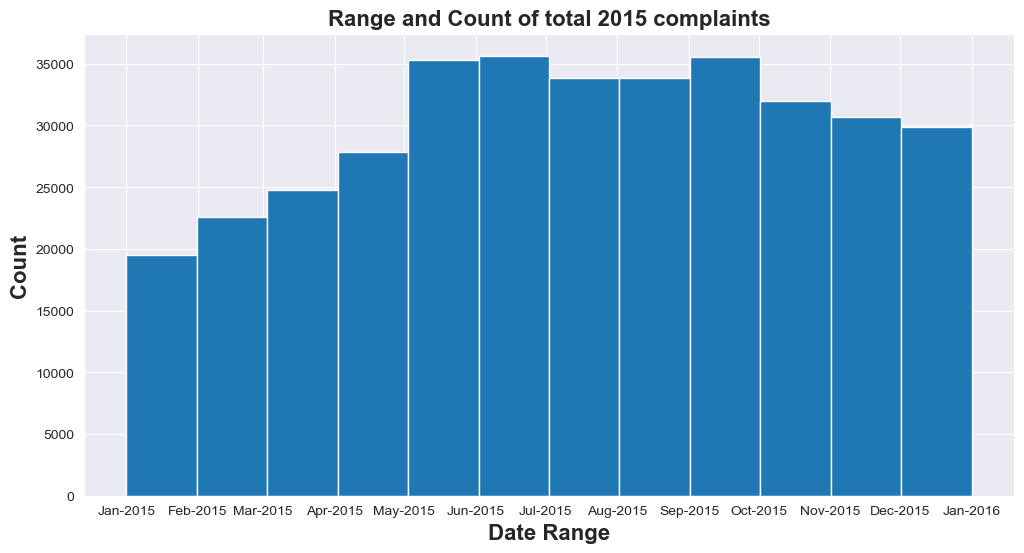

In [18]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
ax = plt.gca()
ax.xaxis_date()

# Locating each month and plotting that on x axis.
month = mdates.MonthLocator()
ax.xaxis.set_major_locator(month)

# Formating the date on x axis to (Month_name-Year).
month_fmt = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(month_fmt)

req_data_df["Created Date"].hist(bins=12) # Specifically set bins to 12, so that dates gets divided into 12 parts, and we get
                                          # approximate monthly distribution and number of compalints.
plt.title('Range and Count of total 2015 complaints',size=16,weight='bold')
plt.ylabel('Count',size=16,weight='bold')
plt.xlabel('Date Range',size=16,weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

***Above histogram shows there was a gradual increase in number of complaints from beginning of January 2015 to the end of April 2015. The complaint count spiked in the month of May,June and September of 2015, and count tapers down a little bit towards the end of year.***

### 2.4) Scatter and Hexbin plots for complaint concentration across Brooklyn

In [19]:
# Making seperate dataset just for Brooklyn city

brooklyn_df = req_data_df[req_data_df['City']=='BROOKLYN']
brooklyn_df

,Created Date,Closed Date,Complaint Type,City,Longitude,Latitude
5,2015-12-31 23:56:30,2016-01-01 01:50:11,Illegal Parking,BROOKLYN,-73.992568,40.660823
9,2015-12-31 23:53:58,2016-01-01 01:17:40,Blocked Driveway,BROOKLYN,-73.999539,40.623793
13,2015-12-31 23:47:58,2016-01-01 08:18:47,Illegal Parking,BROOKLYN,-73.874505,40.687511
17,2015-12-31 23:44:52,2016-01-01 00:36:10,Noise - Commercial,BROOKLYN,-73.983430,40.679154
18,2015-12-31 23:40:59,2016-01-01 02:37:28,Noise - Commercial,BROOKLYN,-73.930202,40.616550
...,...,...,...,...,...,...
364539,2015-01-01 00:23:55,2015-01-01 02:58:38,Blocked Driveway,BROOKLYN,-73.984375,40.691248
364541,2015-01-01 00:19:22,2015-01-01 02:41:10,Blocked Driveway,BROOKLYN,-73.956966,40.713613
364544,2015-01-01 00:17:48,2015-01-01 03:24:48,Noise - Commercial,BROOKLYN,-73.974766,40.680352
364545,2015-01-01 00:17:47,2015-01-01 00:51:13,Blocked Driveway,BROOKLYN,-73.904011,40.692384


In [20]:
brooklyn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118849 entries, 5 to 364546
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Created Date    118849 non-null  datetime64[ns]
 1   Closed Date     118849 non-null  datetime64[ns]
 2   Complaint Type  118849 non-null  object        
 3   City            118849 non-null  object        
 4   Longitude       118632 non-null  float64       
 5   Latitude        118632 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 6.3+ MB


Text(0, 0.5, 'Latitude')

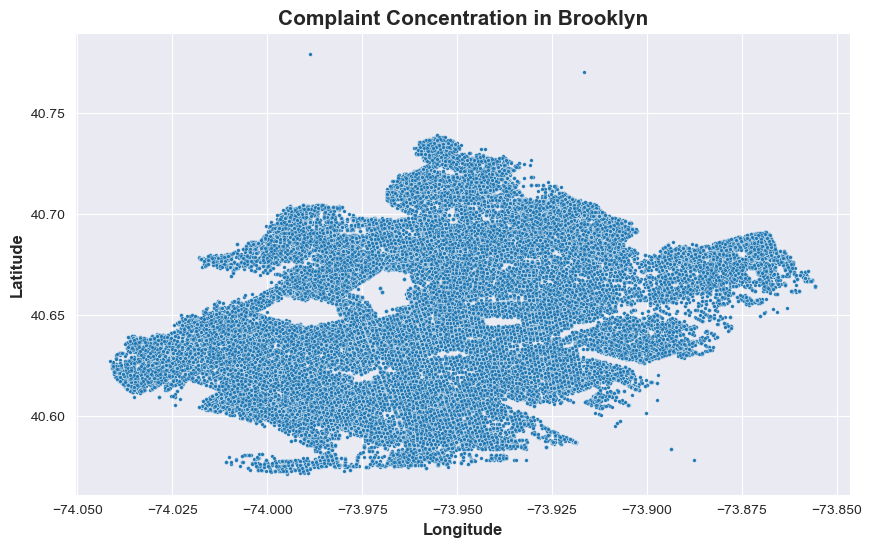

In [21]:
# Plotting Sactter plot for complaint concentration across Brooklyn.

plt.figure(figsize=(10,6))
sn.scatterplot(data=brooklyn_df,x='Longitude', y='Latitude',s=7)
plt.title('Complaint Concentration in Brooklyn',size=15,weight='bold')
plt.xlabel('Longitude',size=12,weight='bold')
plt.ylabel('Latitude',size=12,weight='bold')

In [54]:
import plotly.express as px
import plotly.figure_factory as ff

hex_map = ff.create_hexbin_mapbox(data_frame=brooklyn_df, lon=brooklyn_df['Longitude'], lat=brooklyn_df['Latitude'],
                                 nx_hexagon=30, opacity=0.5, labels={'color':'Complaint Count'}, min_count=1)
hex_map.update_layout(mapbox_style='open-street-map')

***From the above Hexbin map we can see that north and northwest of Brooklyn produced more complaints as compaired to south and east of Brooklyn.***

In [23]:
# Creating date and time from 'Create Date' column

brooklyn_df['Date']=pd.to_datetime(brooklyn_df['Created Date'].dt.date)

brooklyn_df['Time']=[d.strftime('%H:%M:%S') for d in brooklyn_df['Created Date']]
brooklyn_df['Time']=pd.to_datetime(brooklyn_df['Time'])                           # Changing datatype to 'datetime64'
brooklyn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118849 entries, 5 to 364546
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Created Date    118849 non-null  datetime64[ns]
 1   Closed Date     118849 non-null  datetime64[ns]
 2   Complaint Type  118849 non-null  object        
 3   City            118849 non-null  object        
 4   Longitude       118632 non-null  float64       
 5   Latitude        118632 non-null  float64       
 6   Date            118849 non-null  datetime64[ns]
 7   Time            118849 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(2), object(2)
memory usage: 8.2+ MB


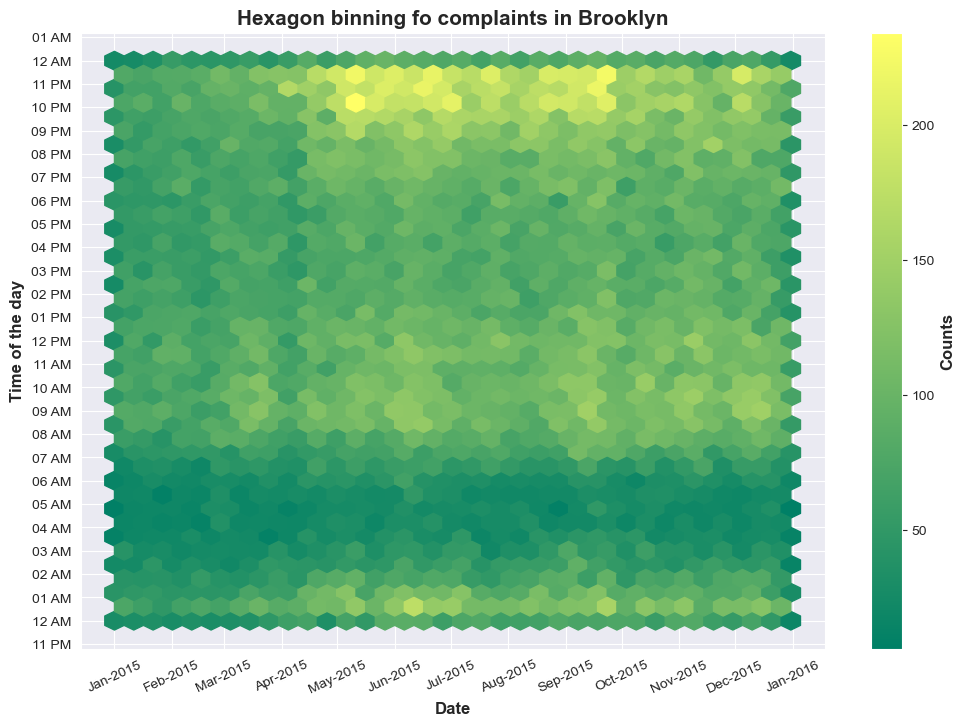

In [24]:
# Plotting Hexbin plot for complaint concentration in brooklyn, during time of the year and time of the day.

x=brooklyn_df['Date']
y=brooklyn_df['Time']

import pylab as pl

plt.figure(figsize=(12,8))
ax = plt.gca()
ax.xaxis_date()
ax.yaxis_date()
hb=ax.hexbin(pl.date2num(x), pl.date2num(y), gridsize=35,cmap='summer')

# Locating each month and plotting that on x axis.
month = mdates.MonthLocator()
ax.xaxis.set_major_locator(month)

# Formating the date on x axis to (Month_name-date-year).
month_fmt = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(month_fmt)

# Locating each hour and plotting that on y axis.
hour = mdates.HourLocator()
ax.yaxis.set_major_locator(hour)

# Formating the time on y axis to (hour AM/PM).
hour_fmt = mdates.DateFormatter('%I %p')
ax.yaxis.set_major_formatter(hour_fmt)

# Plotting color bar.
cb = plt.colorbar(hb)

plt.title('Hexagon binning fo complaints in Brooklyn',size=15,weight='bold')
plt.xlabel('Date',size=12,weight='bold')
plt.xticks(rotation=25)
plt.ylabel('Time of the day',size=12,weight='bold')
cb.set_label('Counts',size=12,weight='bold')

plt.show()

***Above Hexbin plot shows that less number of complaints came in during 2AM to 7AM, when compaired to other times of the day, and it was consistent throughout the year. There has been high number of complaints in Brooklyn, between 8PM to 1AM and from mid of April 2015 to end of October 2015. Another noticeable surge is between 7AM to 2PM.***

# 3) Major types of complaints.

### 3.1) Bar graph of count vs. compalin types.

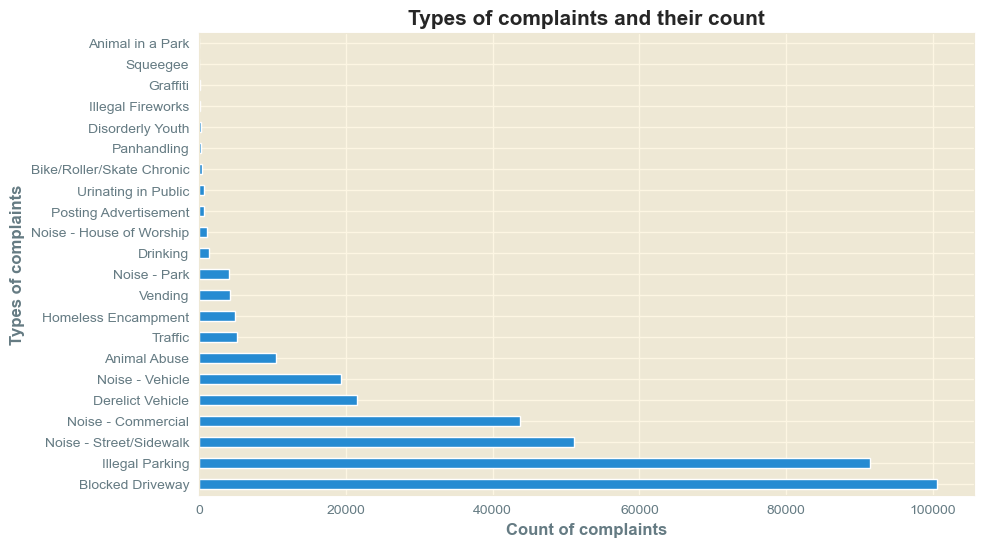

In [25]:
# Plotting types of complaints and their individual count on a bar graph.

plt.figure(figsize=(10,6))
plt.style.use('Solarize_Light2')
req_data_df['Complaint Type'].value_counts().plot(kind='barh') # 'barh' for horizontal plotting and 'bar' for vertical plotting.
plt.title('Types of complaints and their count',size=15,weight='bold')
plt.xlabel('Count of complaints',size=12,weight='bold')
plt.ylabel('Types of complaints',size=12,weight='bold')
plt.show()

***Plot indicates that cities received majority complaints for blocked driveway and illegal parking and that totals to just above 100,000. Following with complaints for street/sidewalk noise and commercial space noise, which are nearly half in number than previous two.***

### 3.2) Top 10 types of complaints.

In [26]:
req_data_df['Complaint Type'].value_counts()[:10]

Blocked Driveway           100538
Illegal Parking             91404
Noise - Street/Sidewalk     51040
Noise - Commercial          43672
Derelict Vehicle            21455
Noise - Vehicle             19292
Animal Abuse                10529
Traffic                      5194
Homeless Encampment          4878
Vending                      4184
Name: Complaint Type, dtype: int64

### 3.3) The type of complaints in each city in seperate dataset.

#### A seperate dataset showing every city with types of complaints came from them, and also shows number of time each type of complaint came for a particular city.

In [27]:
# Making seperate dataset in which it shows types of complaints came from each city.

city_wise_complaint_distribution=pd.DataFrame(pd.crosstab(index=req_data_df['City'],columns=req_data_df['Complaint Type']))
city_wise_complaint_distribution

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,0,50,32,2,1,1,4,0,62,2,14,2,29,10,1,0,0,1,1,1
ASTORIA,170,0,16,3595,440,5,43,4,32,4,1617,1963,21,64,554,236,2,3,0,60,10,57
BAYSIDE,53,0,0,514,231,2,1,3,2,0,638,47,3,4,17,24,0,0,0,9,0,2
BELLEROSE,15,0,1,138,120,2,1,0,1,1,132,38,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,16,4,0,0,1,1,0,0,0,0,0,0
BRONX,1971,0,22,17062,2402,66,206,15,275,24,9889,2944,90,548,9144,3556,20,18,0,427,54,433
BROOKLYN,3191,0,124,36445,6257,79,291,60,948,61,33532,13855,389,1575,13982,5965,49,58,0,1258,155,575
CAMBRIA HEIGHTS,15,0,0,177,148,0,0,0,6,1,113,19,2,0,29,100,0,0,0,7,0,0
CENTRAL PARK,0,0,0,0,0,0,0,0,0,0,5,0,0,0,105,0,0,0,0,0,0,0


# 4) Visualize the major types of complaints in each city.

In [28]:
city_wise_complaint_distribution.index.values
city_list= (city_wise_complaint_distribution.index.values).tolist() # Convert array to list.
city_list

['ARVERNE',
 'ASTORIA',
 'BAYSIDE',
 'BELLEROSE',
 'BREEZY POINT',
 'BRONX',
 'BROOKLYN',
 'CAMBRIA HEIGHTS',
 'CENTRAL PARK',
 'COLLEGE POINT',
 'CORONA',
 'EAST ELMHURST',
 'ELMHURST',
 'FAR ROCKAWAY',
 'FLORAL PARK',
 'FLUSHING',
 'FOREST HILLS',
 'FRESH MEADOWS',
 'GLEN OAKS',
 'HOLLIS',
 'HOWARD BEACH',
 'JACKSON HEIGHTS',
 'JAMAICA',
 'KEW GARDENS',
 'LITTLE NECK',
 'LONG ISLAND CITY',
 'MASPETH',
 'MIDDLE VILLAGE',
 'NEW HYDE PARK',
 'NEW YORK',
 'OAKLAND GARDENS',
 'OZONE PARK',
 'QUEENS',
 'QUEENS VILLAGE',
 'REGO PARK',
 'RICHMOND HILL',
 'RIDGEWOOD',
 'ROCKAWAY PARK',
 'ROSEDALE',
 'SAINT ALBANS',
 'SOUTH OZONE PARK',
 'SOUTH RICHMOND HILL',
 'SPRINGFIELD GARDENS',
 'STATEN ISLAND',
 'SUNNYSIDE',
 'WHITESTONE',
 'WOODHAVEN',
 'WOODSIDE']

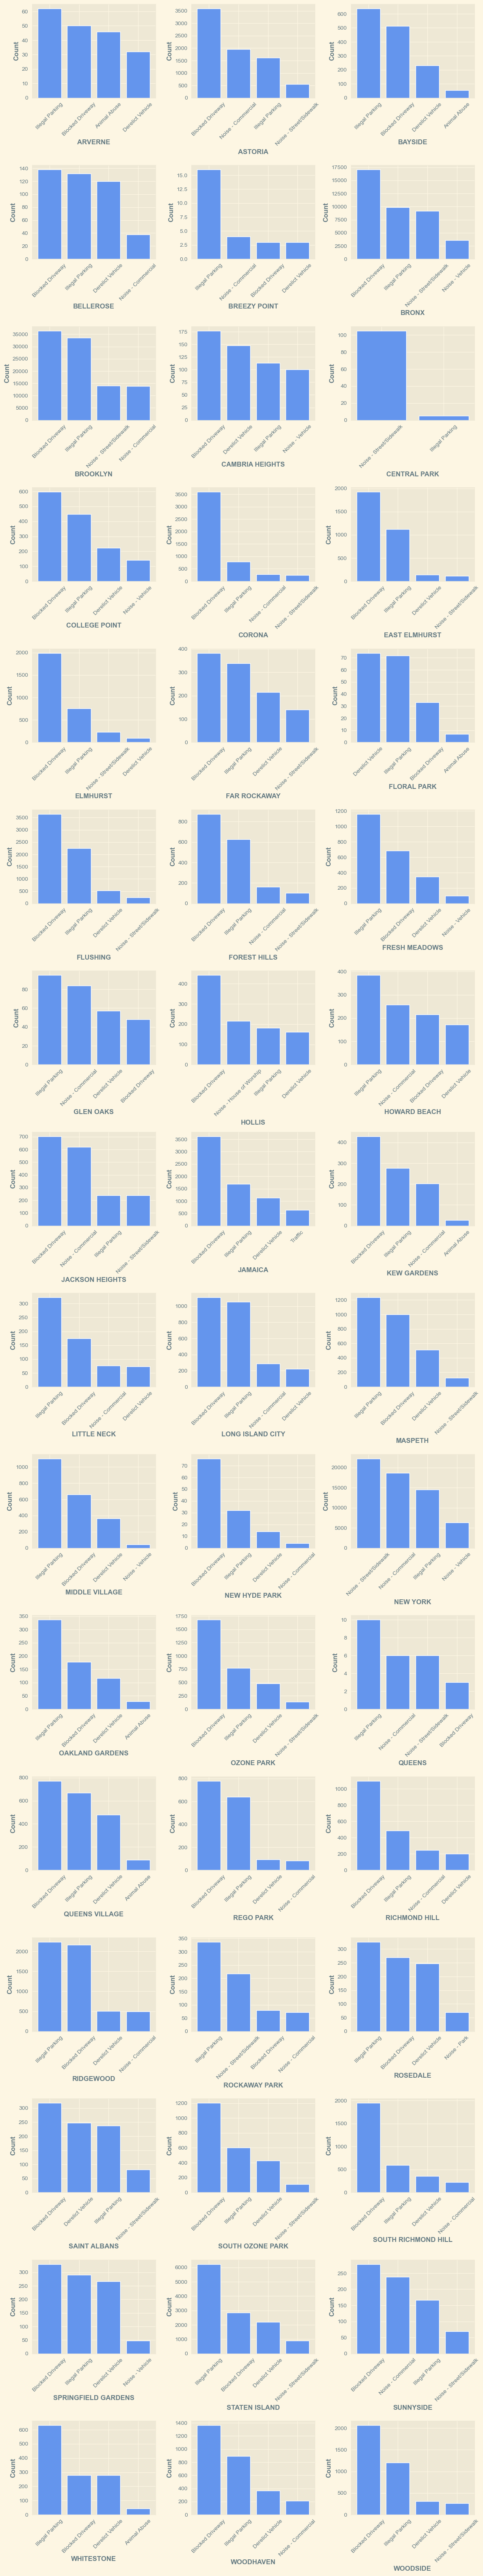

In [38]:
n=0
plt.figure(figsize=(12,70))
for i in city_list:
    city_df=req_data_df[req_data_df['City']== i]                          # Making seperate dataset for each city.
    count=pd.crosstab(index=city_df['Complaint Type'],columns='count')    # Counting number of time each complaint occured.
    descending_df=count.sort_values('count',ascending=False)              # Sorting in descending order.
    top_4=pd.DataFrame(descending_df.head(4))                             # Choosing top 4.
    
    ax=plt.subplot(18,3,n+1)                                              # Plotting
    n=n+1
    plt.bar(top_4.index,top_4['count'],color='cornflowerblue')
    ax.set_xlabel(i,weight='bold')
    plt.xticks(rotation=45)
    ax.set_ylabel('Count',weight='bold')
    plt.tight_layout()

***Above plot shows bar graphs for cities, displaying top four types of complaints in each city.***

# 5) Checking if the average response time across various types of complaints is significantly different.

In [30]:
# Getting time difference between created and closed dates.

req_data_df['Response Time'] = req_data_df['Closed Date'] - req_data_df['Created Date']
req_data_df

,Created Date,Closed Date,Complaint Type,City,Longitude,Latitude,Response Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,Noise - Street/Sidewalk,NEW YORK,-73.923501,40.865682,0 days 00:55:30
1,2015-12-31 23:59:44,2016-01-01 01:26:57,Blocked Driveway,ASTORIA,-73.915094,40.775945,0 days 01:27:13
2,2015-12-31 23:59:29,2016-01-01 04:51:03,Blocked Driveway,BRONX,-73.888525,40.870325,0 days 04:51:34
3,2015-12-31 23:57:46,2016-01-01 07:43:13,Illegal Parking,BRONX,-73.828379,40.835994,0 days 07:45:27
4,2015-12-31 23:56:58,2016-01-01 03:24:42,Illegal Parking,ELMHURST,-73.874170,40.733060,0 days 03:27:44
...,...,...,...,...,...,...,...
364553,2015-01-01 00:04:44,2015-01-01 10:22:31,Illegal Parking,WOODHAVEN,-73.860949,40.695145,0 days 10:17:47
364554,2015-01-01 00:04:28,2015-01-01 02:25:02,Noise - Vehicle,BRONX,-73.907178,40.867830,0 days 02:20:34
364555,2015-01-01 00:01:30,2015-01-01 00:20:33,Noise - Street/Sidewalk,NEW YORK,-73.950873,40.821647,0 days 00:19:03
364556,2015-01-01 00:01:29,2015-01-01 02:42:22,Blocked Driveway,BRONX,-73.853290,40.886361,0 days 02:40:53


In [31]:
req_data_df['Complaint Type'].unique()
complaint_types = (req_data_df['Complaint Type'].unique()).tolist() # Array to list.
complaint_types

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Bike/Roller/Skate Chronic',
 'Panhandling',
 'Noise - Park',
 'Homeless Encampment',
 'Urinating in Public',
 'Graffiti',
 'Disorderly Youth',
 'Illegal Fireworks',
 'Squeegee',
 'Animal in a Park']

In [32]:
complaint_city_total = []                                          # Making this list to use it for ANOVA test.
complaint_type_and_avg_time=[]                                     # Making this list to make avg. response time dataset.

for i in complaint_types:
    complaint_df=req_data_df[req_data_df['Complaint Type']== i]    # Selecting rows only with selected complaint type.
    complaint_city_total.append(complaint_df['Response Time'])     # Appending to list 'complaint_city_total'.
    avg=complaint_df['Response Time'].mean()                       # Average of 'Response Time' column.
    avg_without_seconds = pd.to_timedelta(avg).floor('S')          # Removed decimal point in seconds using 'floor('S')' and it is now easier to read.
    complaint_type_and_avg_time.append({'Complaint Type':i, 'Average Response Time':avg_without_seconds}) # Appending the list 'complaint_type_and_avg_time'.

#### ANOVA test for compalint type vs response time for each compalint, to see if there is a significant difference between complaint type and response time.
- Null Hypothesis (H0) : The average response for all complaints is same.
- Alternative Hypotehsis (Ha) : The average response for all complaints is not same.
- Assuming alpha is 0.05.

In [37]:
from scipy.stats import f_oneway

f_stat, p_val=f_oneway(*complaint_city_total)
print('f_stat =',f_stat)
print('p-value =',p_val)

f_stat = 591.7186943886298
p-value = 0.0


***As the p-value < alpha, we are going to reject H0.The average response for all complaints is not equal, that menans there is a significant difference between complaint response times.***

In [36]:
# Creating a seperate dataframe for complaint types and their average response time, and sorting dataframe from high to low 
# response time.

Avg_resp_time_df=pd.DataFrame(complaint_type_and_avg_time)
Average_resp_time_df=Avg_resp_time_df.sort_values('Average Response Time',ascending=False)
Average_resp_time_df

,Complaint Type,Average Response Time
21,Animal in a Park,14 days 00:50:34
3,Derelict Vehicle,0 days 07:01:19
17,Graffiti,0 days 06:27:56
8,Animal Abuse,0 days 05:00:33
1,Blocked Driveway,0 days 04:30:18
13,Panhandling,0 days 04:22:45
2,Illegal Parking,0 days 04:19:50
15,Homeless Encampment,0 days 04:17:32
20,Squeegee,0 days 04:02:40
9,Vending,0 days 03:59:25


***Average_resp_time_df displays the average amount of time taken to respond to each type of complaint.***

# 6) Performing a statistical analysis using p-values and chi-square values

#### As the highest number of complaints come from top 4 type of compalints, we are goint to use those, and we are going to take top 5 cities where highest number of complents come from.
- Null Hypothesis(H0) = There is a relationship between city and type of complaint.
- Alternative Hypotehsis(Ha) = There is no relationship between city and type of complaint.
- We are going to use chi-sq test of independence for this hypothesis testing.
- Assuming Alpha at 0.05.

In [40]:
top_4_complaints = req_data_df['Complaint Type'].value_counts()[:4]
top_4_complaints

Blocked Driveway           100538
Illegal Parking             91404
Noise - Street/Sidewalk     51040
Noise - Commercial          43672
Name: Complaint Type, dtype: int64

In [41]:
top_5_city = req_data_df['City'].value_counts()[:5]
top_5_city

BROOKLYN         118849
NEW YORK          77289
BRONX             49166
STATEN ISLAND     15335
JAMAICA            8930
Name: City, dtype: int64

In [53]:
top_city_df = req_data_df[req_data_df['City'].isin(top_5_city.index)] # Making Dataframe for top 5 cities

top_city_and_complaints = top_city_df[top_city_df['Complaint Type'].isin(top_4_complaints.index)] # Making dataframe for top 5 
                                                                                    #cities and with top 4 types of complaints.
top_city_and_complaints

,Created Date,Closed Date,Complaint Type,City,Longitude,Latitude,Response Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,Noise - Street/Sidewalk,NEW YORK,-73.923501,40.865682,0 days 00:55:30
2,2015-12-31 23:59:29,2016-01-01 04:51:03,Blocked Driveway,BRONX,-73.888525,40.870325,0 days 04:51:34
3,2015-12-31 23:57:46,2016-01-01 07:43:13,Illegal Parking,BRONX,-73.828379,40.835994,0 days 07:45:27
5,2015-12-31 23:56:30,2016-01-01 01:50:11,Illegal Parking,BROOKLYN,-73.992568,40.660823,0 days 01:53:41
6,2015-12-31 23:55:32,2016-01-01 01:53:54,Illegal Parking,NEW YORK,-73.937375,40.840848,0 days 01:58:22
...,...,...,...,...,...,...,...
364550,2015-01-01 00:06:43,2015-01-01 06:05:18,Blocked Driveway,BRONX,-73.864866,40.817326,0 days 05:58:35
364551,2015-01-01 00:06:02,2015-01-01 00:43:41,Noise - Street/Sidewalk,BRONX,-73.911679,40.848639,0 days 00:37:39
364552,2015-01-01 00:05:05,2015-01-01 01:22:10,Noise - Street/Sidewalk,NEW YORK,-73.987770,40.721235,0 days 01:17:05
364555,2015-01-01 00:01:30,2015-01-01 00:20:33,Noise - Street/Sidewalk,NEW YORK,-73.950873,40.821647,0 days 00:19:03


In [50]:
required = pd.crosstab(index=top_city_and_complaints['City'],columns=top_city_and_complaints['Complaint Type'])
required

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk
City,,,,
BRONX,17062,9889,2944,9144
BROOKLYN,36445,33532,13855,13982
JAMAICA,3620,1698,552,365
NEW YORK,2705,14549,18686,22245
STATEN ISLAND,2845,6224,783,885


In [51]:
import scipy.stats as stats

chi_sq_stats, p_value, degrees, exp_value=stats.chi2_contingency(required)
print('chi_sq_stats =',chi_sq_stats)
print('p-value =',p_value)
print('degrees =',degrees)
print('exp_value =',exp_value)

chi_sq_stats = 44753.894728419706
p-value = 0.0
degrees = 12
exp_value = [[11541.18863733 12133.19083062  6779.94424791  8584.67628414]
 [28916.97598226 30400.26455356 16987.46040281 21509.29906137]
 [ 1843.26727513  1937.81717843  1082.83901703  1371.07652941]
 [17201.36429885 18083.70369322 10105.05023348 12794.88177444]
 [ 3174.20380642  3337.02374416  1864.70609877  2361.06635064]]


In [52]:
critical_value = stats.chi2.ppf(q=0.95, df=12)
print('Critical Value =',critical_value)

Critical Value = 21.02606981748307


***Since our chi_sq_stat value is much greater than critical value, and our p-value is 0, which is less than alpha.
We are going to reject our null hypothesis (H0), and conclude that their is no relationship between city and type of complaint.***